### Anticipatory Maintenance for Industrial Machinery

This initiative focuses on harnessing data from industrial devices within a manufacturing company to anticipate maintenance needs, thereby averting breakdowns and reducing costs. As companies expand, manual maintenance tracking becomes increasingly challenging. To address this, we present an innovative solution: leveraging sensor data to predict optimal maintenance timings.

The objective is to intricately analyze sensor data, determining the optimal moments for maintenance on these devices. Our approach involves employing cutting-edge techniques to streamline this predictive maintenance process efficiently.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('predictive_maintenance.csv')

In [3]:
print(df.head())

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure  


In [4]:
print(df.isnull().sum())

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


In [5]:
print(df.describe())

               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  
count            10000.000000  10000.000000     10000.000000  10000.000000  
mean              1538.776100     39.986910       107.951000      0.033900  
std                179.284096      9.968934        63.654147      0.180981  
min               1168.000000      3.800000         0.000000      0.000000  
25

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [7]:
print(df['Type'].value_counts())
print(df['Failure Type'].value_counts())

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64


In [8]:
df.columns = ['UDI', 'Product ID', 'Type', 'Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear', 'Machine failure', 'Failure type']


In [9]:
df.describe().T

count        mean          std     min      25%  \
UDI                  10000.0  5000.50000  2886.895680     1.0  2500.75   
Air temperature      10000.0   300.00493     2.000259   295.3   298.30   
Process temperature  10000.0   310.00556     1.483734   305.7   308.80   
Rotational speed     10000.0  1538.77610   179.284096  1168.0  1423.00   
Torque               10000.0    39.98691     9.968934     3.8    33.20   
Tool wear            10000.0   107.95100    63.654147     0.0    53.00   
Machine failure      10000.0     0.03390     0.180981     0.0     0.00   

                        50%      75%      max  
UDI                  5000.5  7500.25  10000.0  
Air temperature       300.1   301.50    304.5  
Process temperature   310.1   311.10    313.8  
Rotational speed     1503.0  1612.00   2886.0  
Torque                 40.1    46.80     76.6  
Tool wear             108.0   162.00    253.0  
Machine failure         0.0     0.00      1.0

These statistics provide insights into the central tendency, spread, and distribution of your numerical data, helping to understand the characteristics of each feature in your dataset.

In [10]:
# Select columns with object data type and then describe
categorical_summary = df.select_dtypes(include=['object']).describe().T

# Display the results
print(categorical_summary)


              count unique         top  freq
Product ID    10000  10000      M14860     1
Type          10000      3           L  6000
Failure type  10000      6  No Failure  9652


summary statistics for columns 'Product ID', 'Type', and 'Failure Type'. For instance, 'Type' has three unique values (L, M, H), and the most frequent value is 'L' with a frequency of 6000. 'Failure Type' has six unique values, with 'No Failure' being the most frequent. This information is helpful in understanding the composition and distribution of categorical variables in the dataset.

### These visualizations provide a comprehensive overview of ata, helping you identify patterns, trends, and potential outliers.

### Histograms of Numerical Features:

Create histograms to visualize the distribution of numerical features such as 'Air temperature', 'Process temperature', 'Rotational speed', 'Torque', and 'Tool wear'.
python


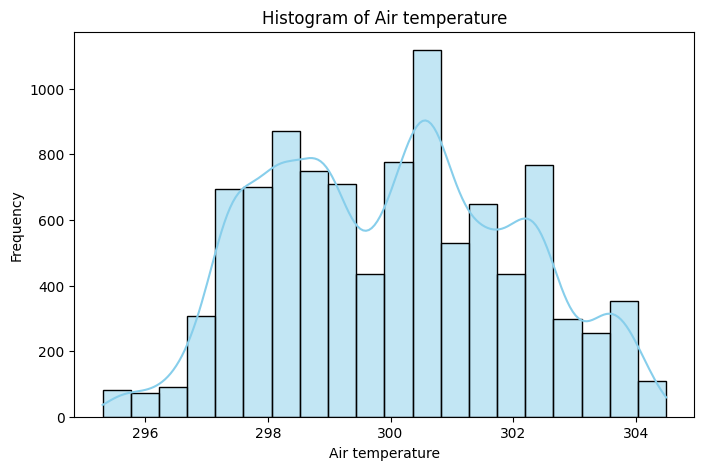

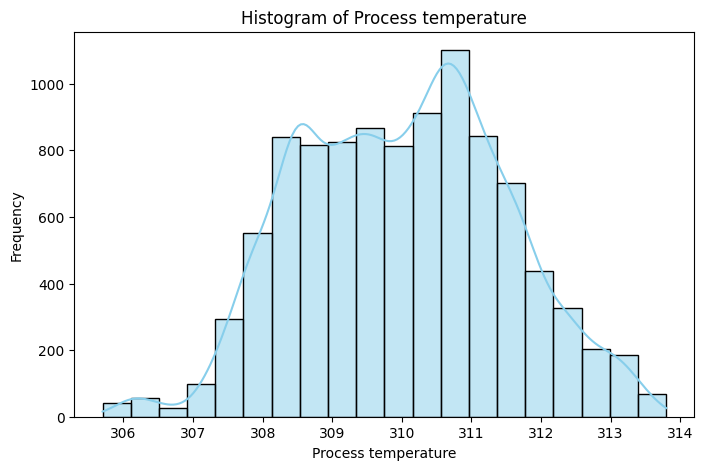

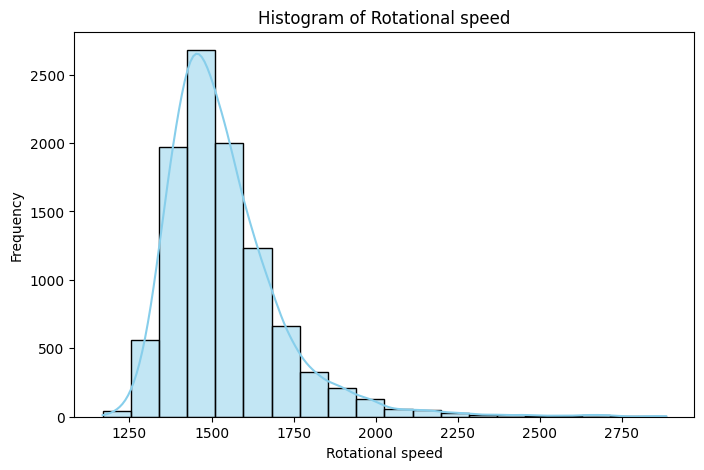

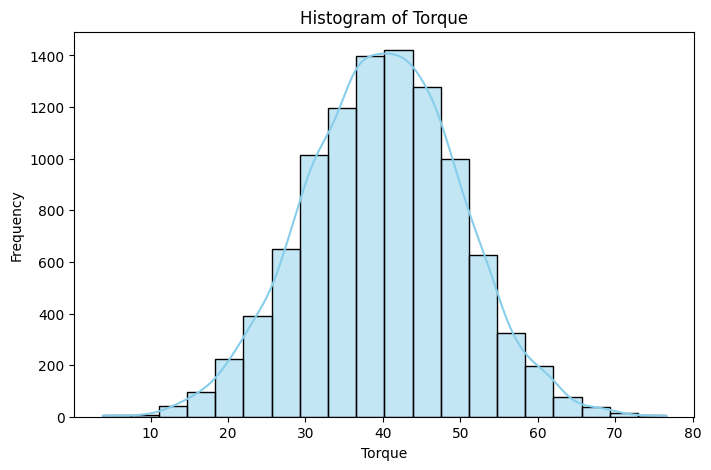

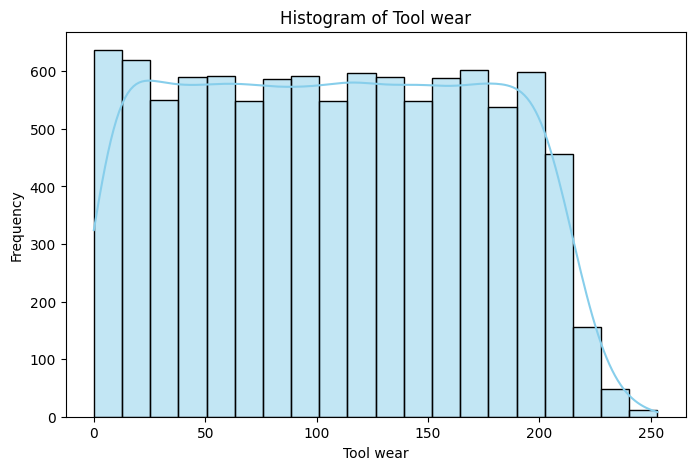

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear']

for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], bins=20, kde=True, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


Pair Plots for Numerical Relationships:

Explore relationships between numerical features using pair plots.

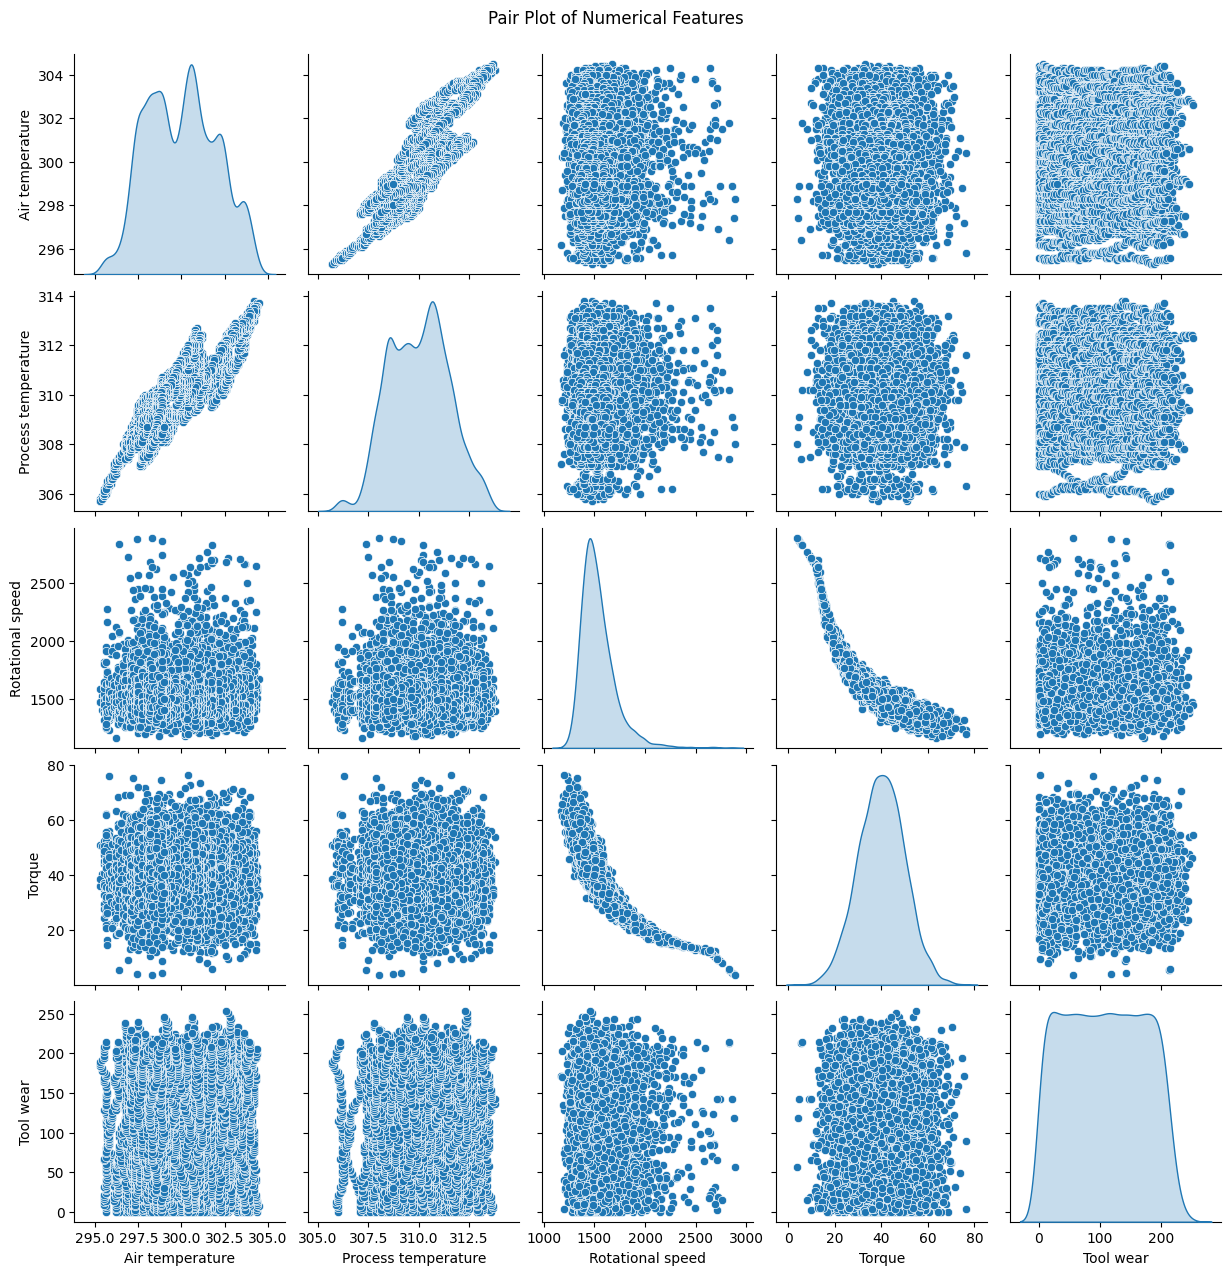

In [12]:
sns.pairplot(df[numerical_columns], diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()


Correlation Heatmap:

Create a heatmap to visualize the correlation between numerical features.

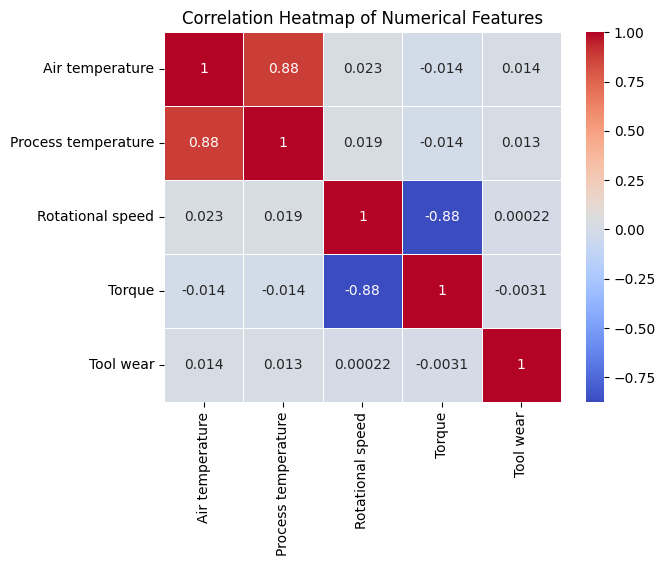

In [13]:
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


Time Series Plots:

If applicable, create time series plots for features over time.

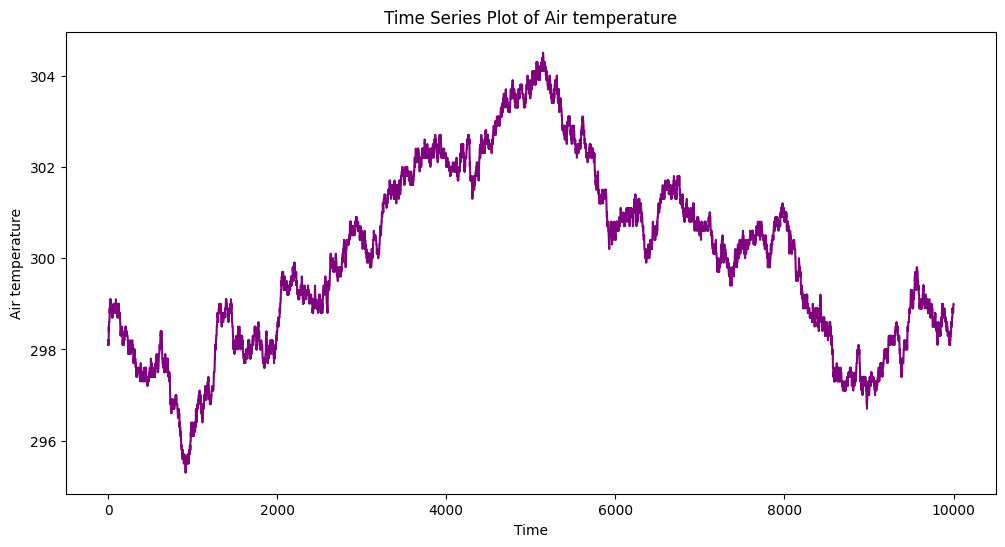

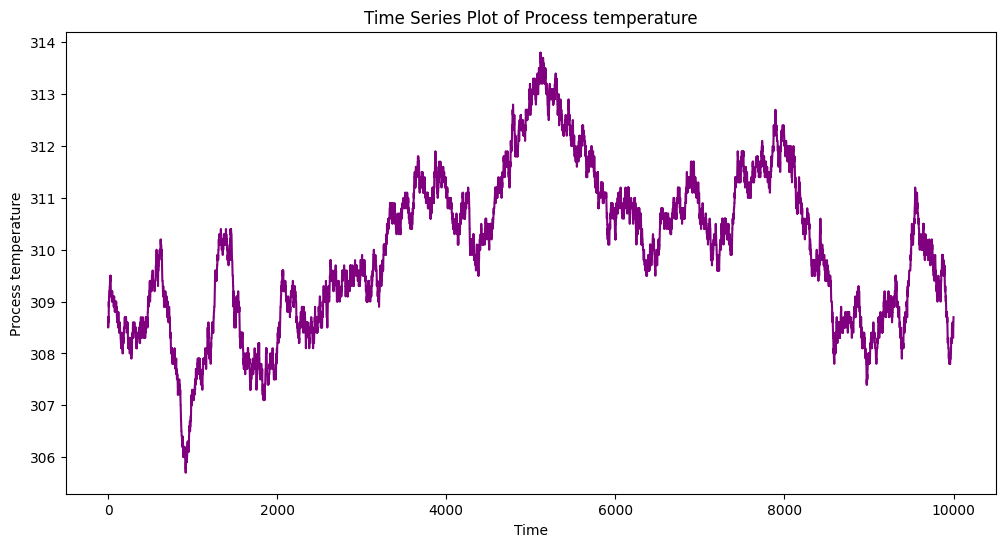

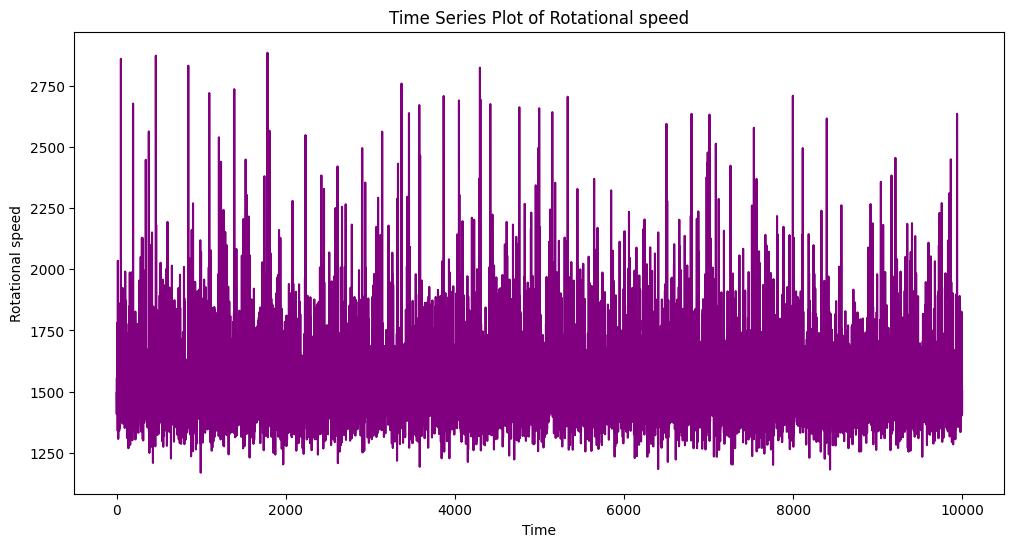

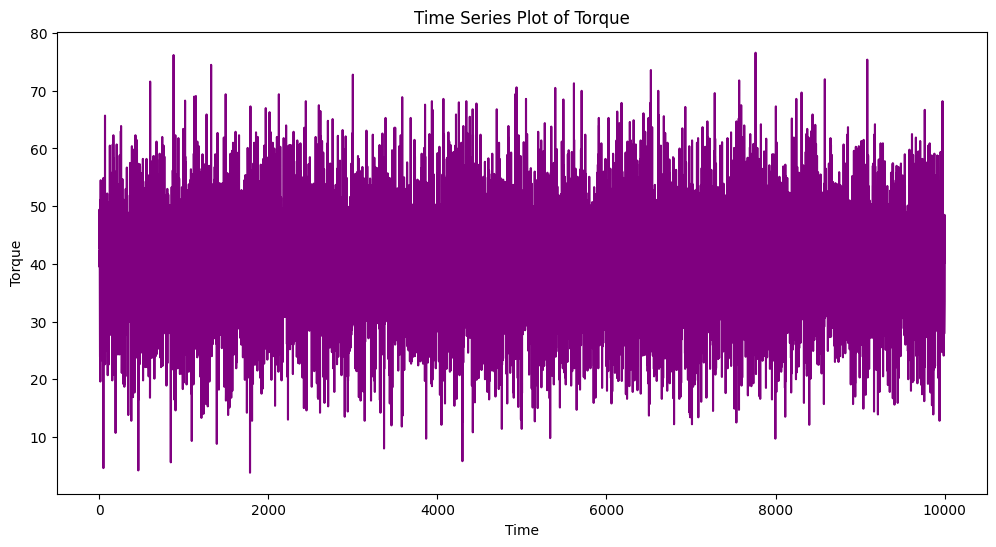

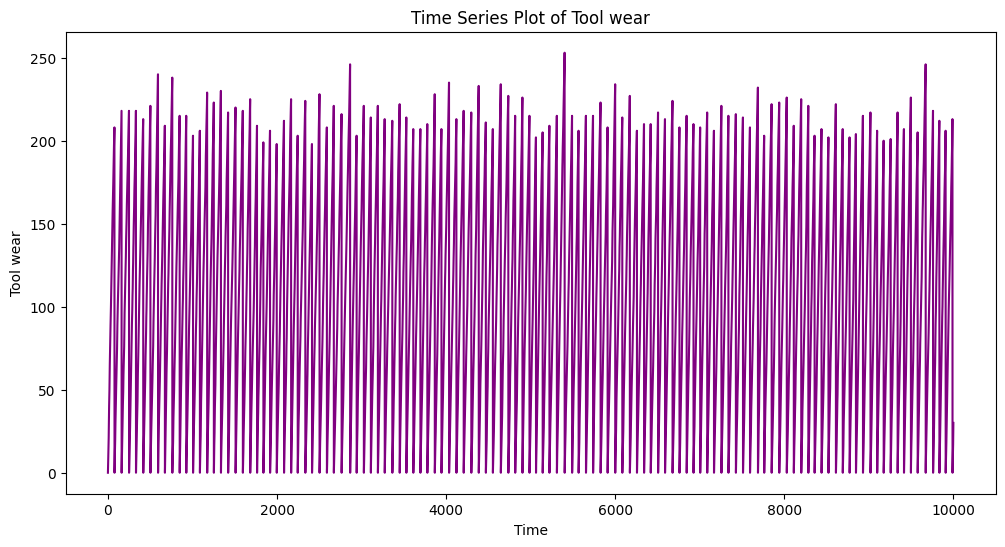

In [14]:
time_series_columns = ['Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear']

for column in time_series_columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=df.index, y=df[column], color='purple')
    plt.title(f'Time Series Plot of {column}')
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.show()


 Identification of the numerical columns (num_cols), categorical columns (cat_cols), and the target label (label),
 It is instrumental in uncovering patterns, relationships, and outliers within the dataset. It lays the groundwork for making informed decisions throughout the predictive maintenance project, from feature selection to model development, ultimately enhancing the project's predictive capabilities and practical application in preventing machine failures.

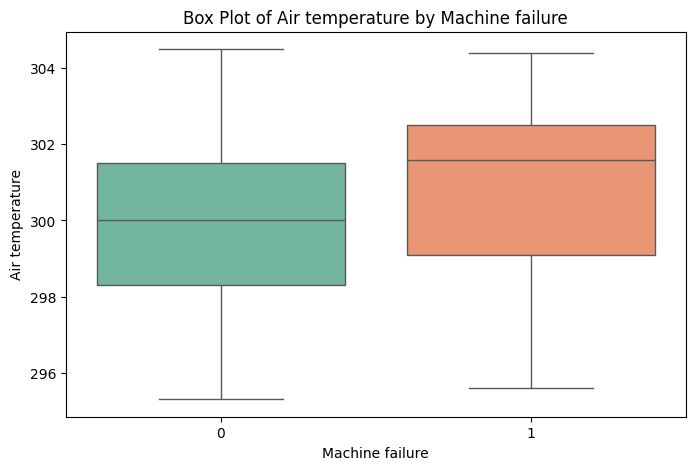

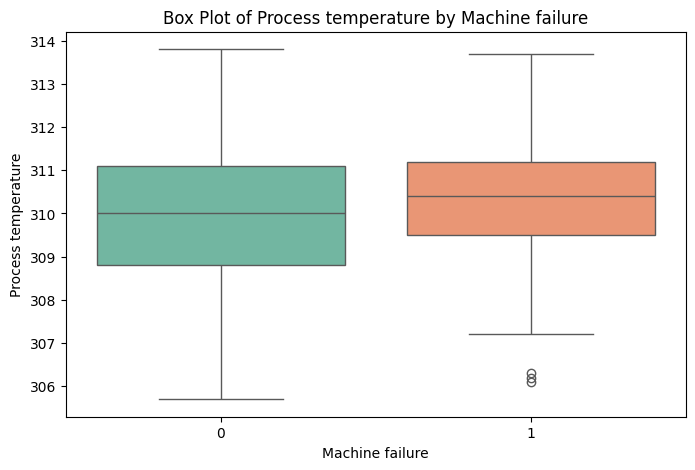

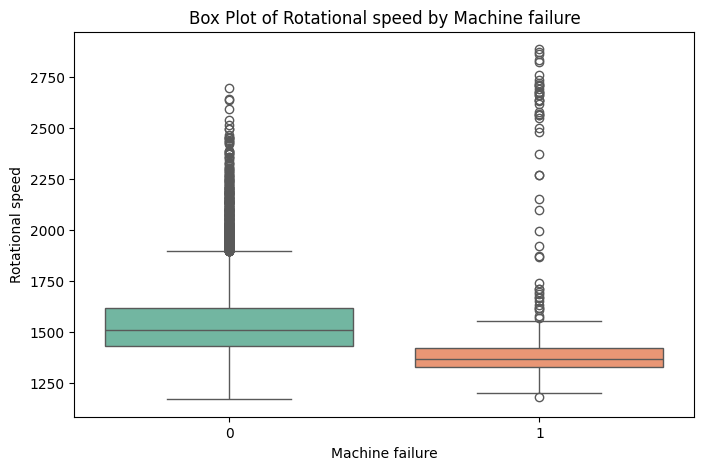

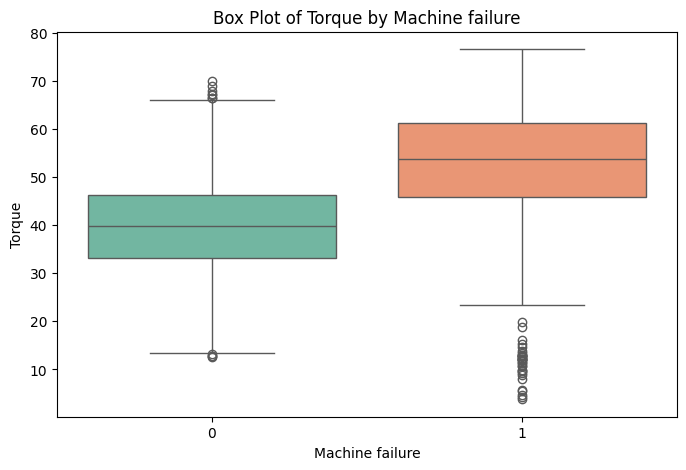

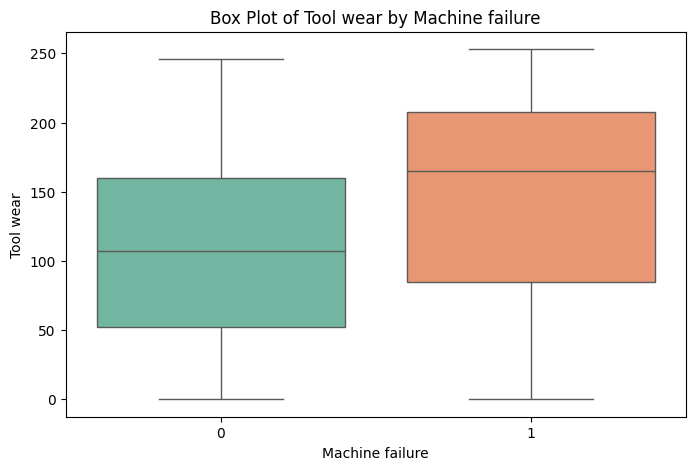

In [15]:
num_cols = ['Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear']

num_cols = ['Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear']

for column in num_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Machine failure', y=column, hue='Machine failure', data=df, palette='Set2', legend=False)
    plt.title(f'Box Plot of {column} by Machine failure')
    plt.xlabel('Machine failure')
    plt.ylabel(column)
    plt.show()



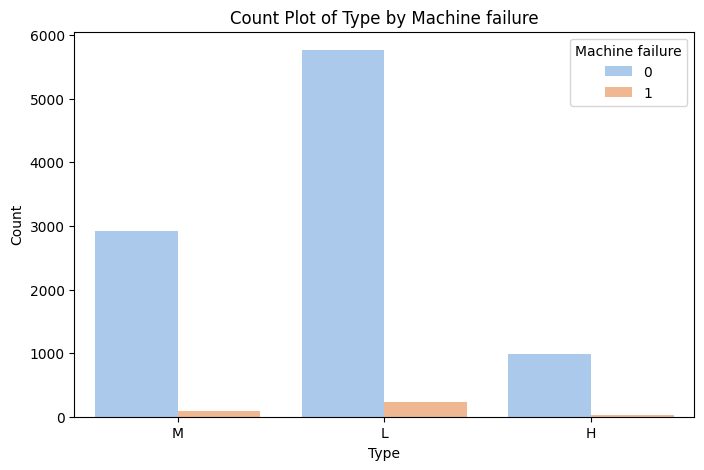

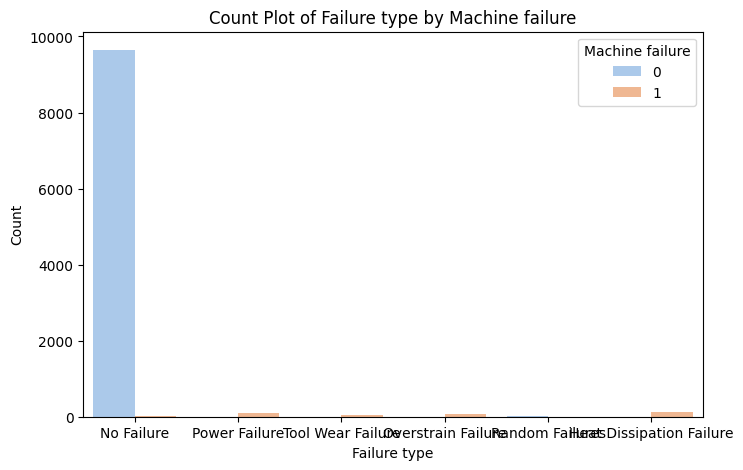

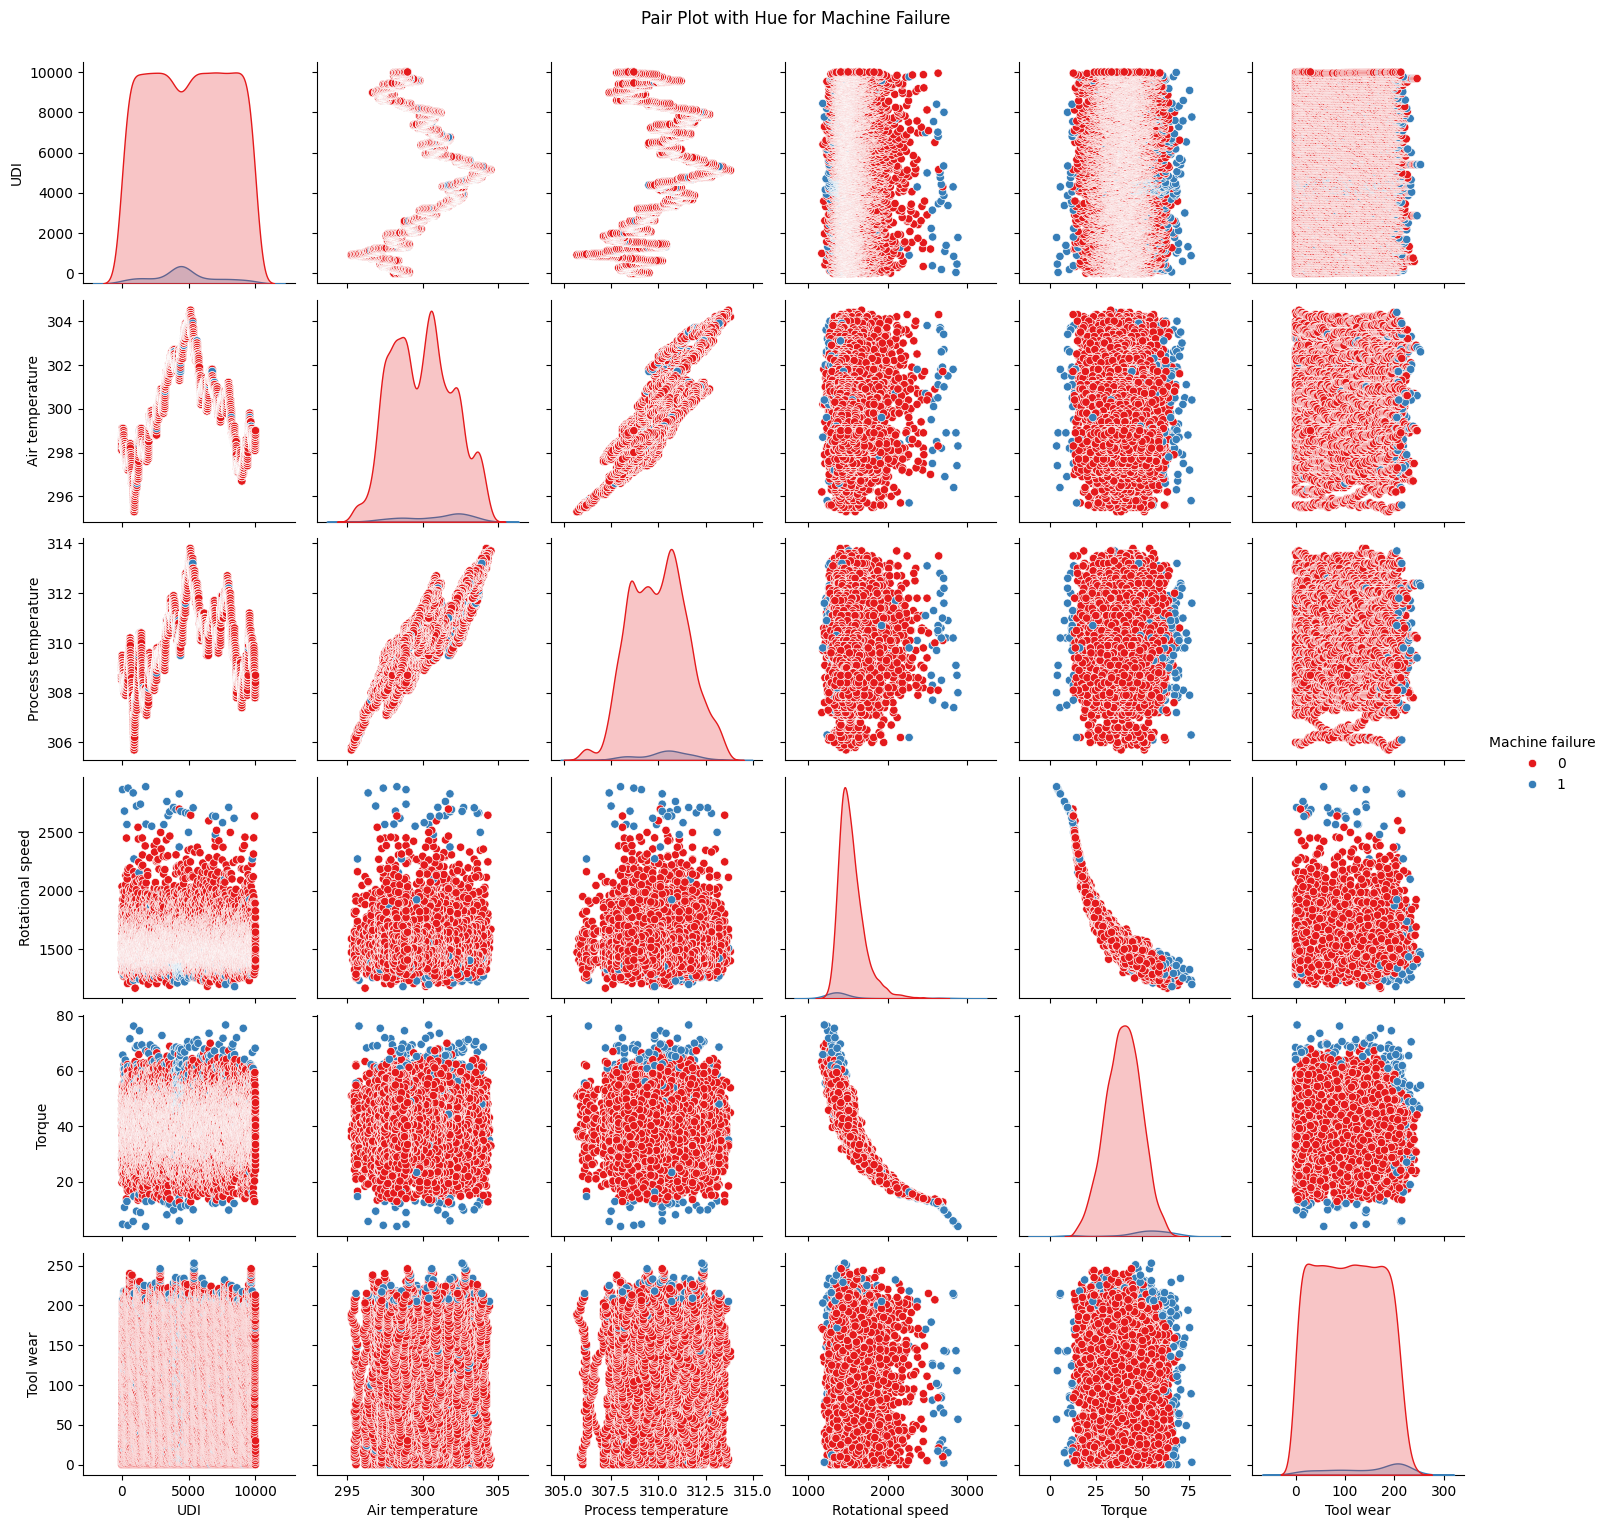

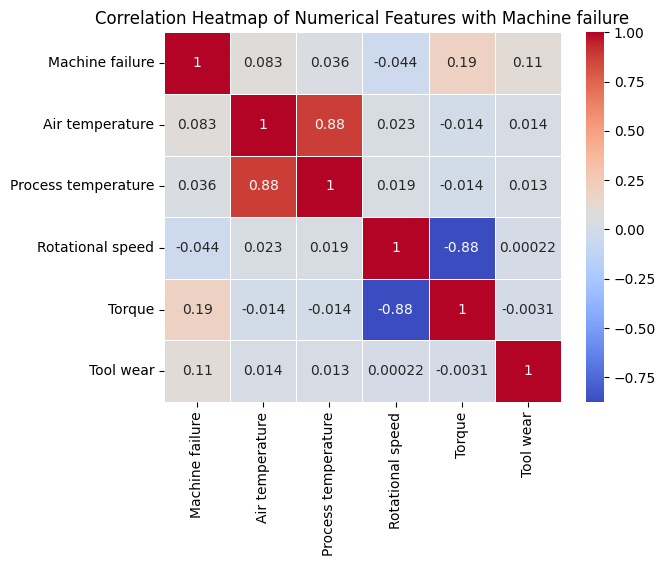

In [16]:
cat_cols = ['Type', 'Failure type']

for column in cat_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df[column], hue=df['Machine failure'], palette='pastel')
    plt.title(f'Count Plot of {column} by Machine failure')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

sns.pairplot(df, hue='Machine failure', palette='Set1', diag_kind='kde')
plt.suptitle('Pair Plot with Hue for Machine Failure', y=1.02)
plt.show()

correlation_matrix_with_label = df[['Machine failure'] + num_cols].corr()
sns.heatmap(correlation_matrix_with_label, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features with Machine failure')
plt.show()


In [17]:
# Check for missing values
missing_values = df.isnull().sum()

# Handle missing values (example: fill with mean or median for numerical features)
df['Air temperature'].fillna(df['Air temperature'].mean(), inplace=True)
df['Process temperature'].fillna(df['Process temperature'].mean(), inplace=True)
# Repeat for other numerical columns

# Alternatively, you can use methods like imputation or drop columns with excessive missing values
# data.dropna(subset=['column_name'], inplace=True)


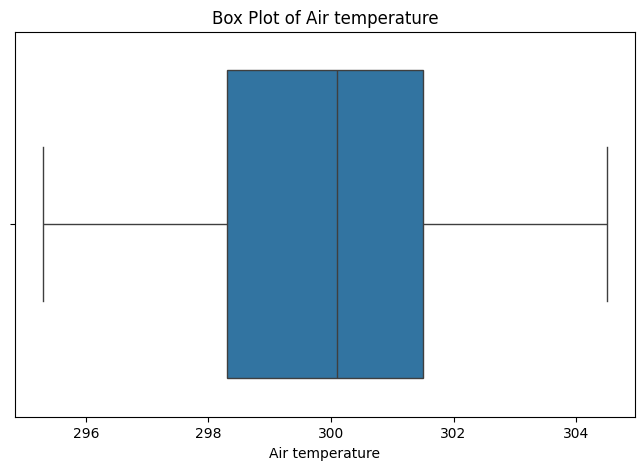

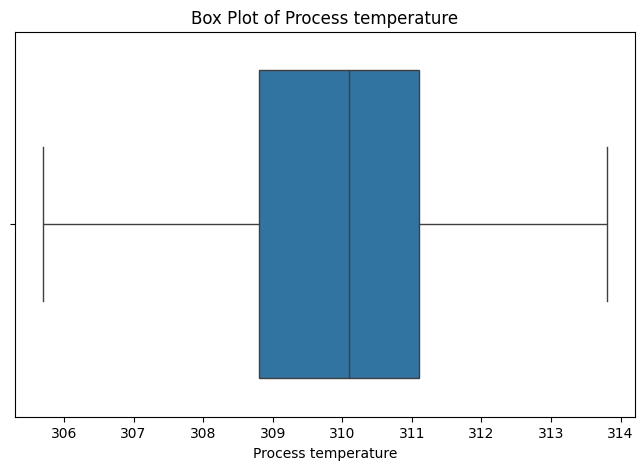

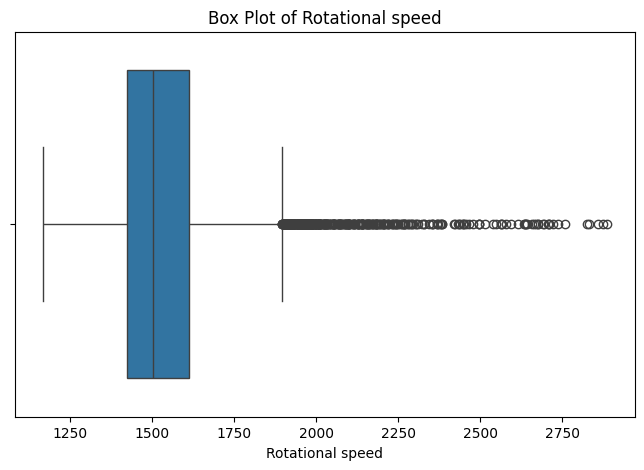

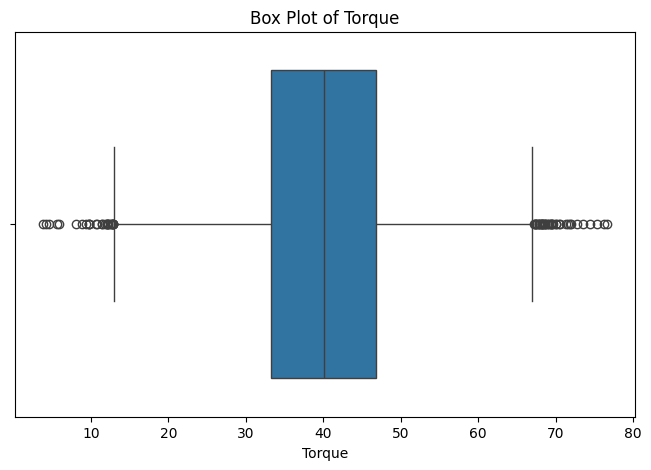

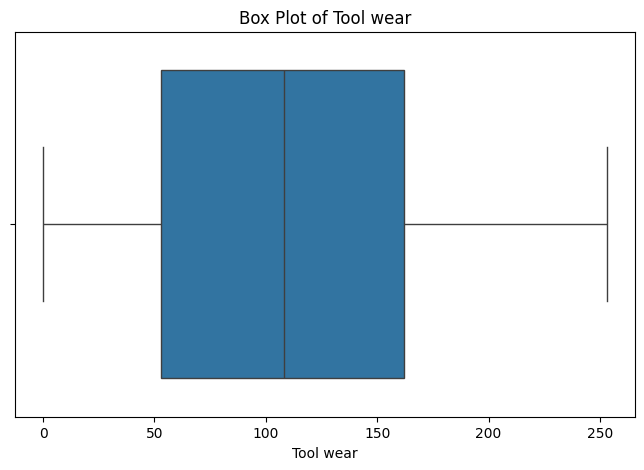

In [18]:
import pandas as pd

# Visualize outliers using box plots
for column in num_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

# Identify and handle outliers (example: clipping values)
for column in num_cols:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    df[column] = df[column].clip(lower=q1 - 1.5 * iqr, upper=q3 + 1.5 * iqr)


 Encoding Categorical Variables (One-Hot Encoding)

In [19]:
import pandas as pd

# Assuming df is your DataFrame
df = pd.get_dummies(df)


 Scaling or Normalizing Numerical Features:

In [20]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale numerical features (example: Air temperature, Process temperature, etc.)
df[num_cols] = scaler.fit_transform(df[num_cols])


In [21]:
print(df.head())


   UDI  Air temperature  Process temperature  Rotational speed    Torque  \
0    1        -0.952389            -0.947360          0.140180  0.284091   
1    2        -0.902393            -0.879959         -0.820899  0.637122   
2    3        -0.952389            -1.014761         -0.216024  0.949807   
3    4        -0.902393            -0.947360         -0.652879 -0.048768   
4    5        -0.902393            -0.879959         -0.820899  0.001665   

   Tool wear  Machine failure  Product ID_H29424  Product ID_H29425  \
0  -1.695984                0              False              False   
1  -1.648852                0              False              False   
2  -1.617430                0              False              False   
3  -1.586009                0              False              False   
4  -1.554588                0              False              False   

   Product ID_H29432  ...  Product ID_M24859  Type_H  Type_L  Type_M  \
0              False  ...              False

In [22]:
print(df.columns)


Index(['UDI', 'Air temperature', 'Process temperature', 'Rotational speed',
       'Torque', 'Tool wear', 'Machine failure', 'Product ID_H29424',
       'Product ID_H29425', 'Product ID_H29432',
       ...
       'Product ID_M24859', 'Type_H', 'Type_L', 'Type_M',
       'Failure type_Heat Dissipation Failure', 'Failure type_No Failure',
       'Failure type_Overstrain Failure', 'Failure type_Power Failure',
       'Failure type_Random Failures', 'Failure type_Tool Wear Failure'],
      dtype='object', length=10016)


his conversion can be beneficial if you are planning to use these columns as features for a machine learning model or if you want to conduct numerical analysis that requires integer values. For example, certain machine learning algorithms may expect numerical inputs.

In [23]:
def convert_bool_to_int(df, columns):
    df[columns] = df[columns].astype(int)
    return df

# Specify the columns you want to convert
columns_to_convert = ['Product ID_H29424', 'Product ID_H29425', 'Product ID_H29432', 'Type_H', 'Type_L', 'Type_M',
                      'Failure type_Heat Dissipation Failure', 'Failure type_No Failure', 'Failure type_Overstrain Failure',
                      'Failure type_Power Failure', 'Failure type_Random Failures', 'Failure type_Tool Wear Failure']

# Call the function to convert boolean columns to integers
df = convert_bool_to_int(df, columns_to_convert)

# Print the modified DataFrame
print(df)


        UDI  Air temperature  Process temperature  Rotational speed    Torque  \
0         1        -0.952389            -0.947360          0.140180  0.284091   
1         2        -0.902393            -0.879959         -0.820899  0.637122   
2         3        -0.952389            -1.014761         -0.216024  0.949807   
3         4        -0.902393            -0.947360         -0.652879 -0.048768   
4         5        -0.902393            -0.879959         -0.820899  0.001665   
...     ...              ...                  ...               ...       ...   
9995   9996        -0.602417            -1.082162          0.496384 -1.057429   
9996   9997        -0.552421            -1.082162          0.684567 -0.825437   
9997   9998        -0.502425            -0.947360          0.771938 -0.664051   
9998   9999        -0.502425            -0.879959         -0.820899  0.859028   
9999  10000        -0.502425            -0.879959         -0.202583  0.021839   

      Tool wear  Machine fa

feature engineering

Analyzing temporal patterns and incorporating time series analysis techniques can be crucial for predictive maintenance in industrial settings. Here are some advanced feature engineering techniques related to temporal patterns and time series analysis

Lag Features:

Create lag features by incorporating information from previous time steps. For example, introduce features like the temperature, torque, or tool wear from the previous time step.

In [24]:
# Example: Creating lag features for 'Torque' with a lag of 1 time step
df['Torque_Lag1'] = df['Torque'].shift(1)


Rolling Statistics:

Compute rolling statistics such as rolling mean, rolling standard deviation, etc., to capture trends or fluctuations over a window of time.

In [25]:
# Example: Calculating the rolling mean for 'Tool wear' over a window of 3 time steps
df['Tool_Wear_Rolling_Mean'] = df['Tool wear'].rolling(window=3).mean()


Time-Based Aggregations:

Aggregate data over different time intervals (e.g., hourly, daily) to extract patterns or trends at different temporal granularities.

In [26]:
# Convert the 'UDI' index to datetime
df.index = pd.to_datetime(df.index)

# Aggregating 'Torque' over daily intervals and calculating the mean
daily_aggregated = df['Torque'].resample('D').mean()

# Print the aggregated DataFrame
print(daily_aggregated)



1970-01-01   -3.312180e-16
Freq: D, Name: Torque, dtype: float64


ime Since Last Failure:

If your dataset includes failure events, create a feature indicating the time elapsed since the last failure.

In [27]:
# Example: Calculating time since the last failure
df['Time_Since_Last_Failure'] = df.groupby('Machine failure').cumcount()


Seasonal Decomposition:

Decompose time series into seasonal, trend, and residual components using techniques like seasonal decomposition of time series (STL).

In [28]:
!pip install statsmodels


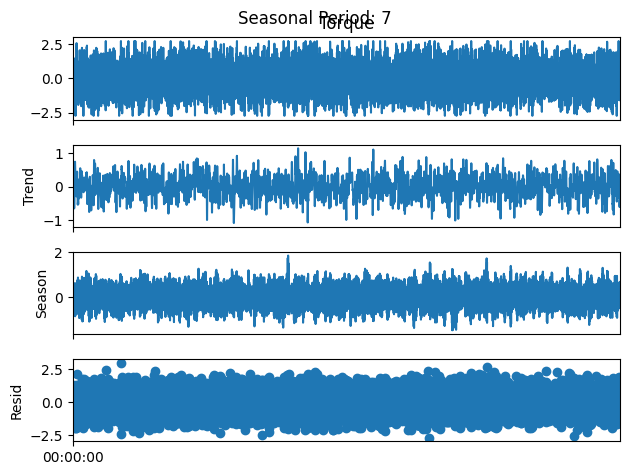

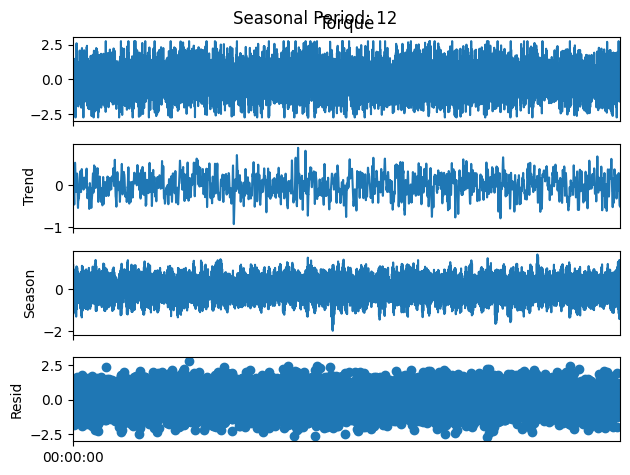

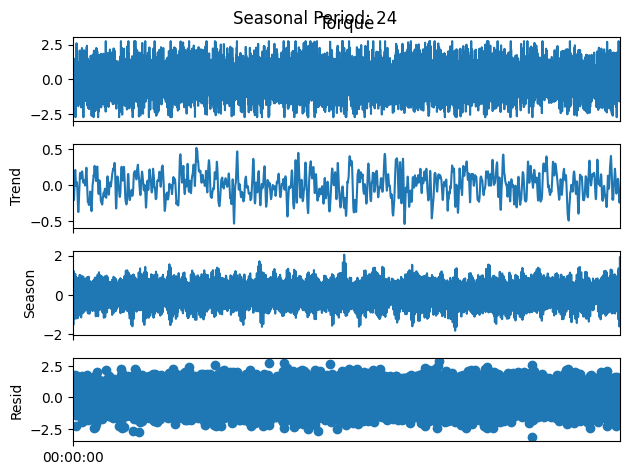

In [29]:
from statsmodels.tsa.seasonal import STL

# Try different seasonal periods
possible_seasonal_periods = [7, 12, 24]  # Adjust as needed

for period in possible_seasonal_periods:
    stl = STL(df['Torque'], period=period)
    result = stl.fit()

    # Visualize decomposed components
    result.plot()
    plt.suptitle(f'Seasonal Period: {period}')
    plt.show()


Autocorrelation Features:

Compute autocorrelation features to identify patterns or periodicities in the time series.

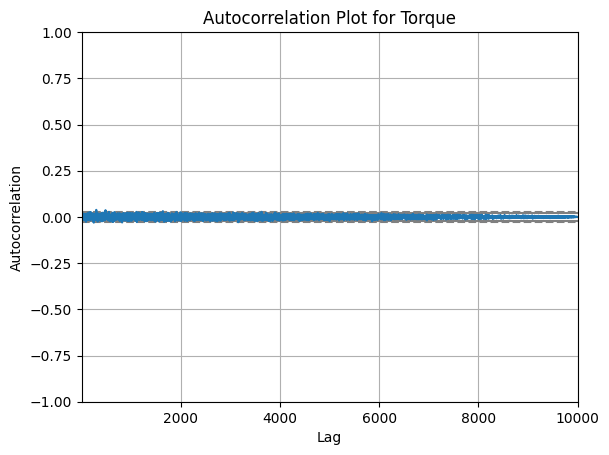

In [30]:
from pandas.plotting import autocorrelation_plot

# Autocorrelation plot for 'Torque'
autocorrelation_plot(df['Torque'])
plt.title('Autocorrelation Plot for Torque')
plt.show()



These techniques can help capture and leverage temporal patterns in your data, providing valuable information for predictive maintenance models. Choose the techniques that align with the characteristics of your dataset and the goals of your predictive maintenance project.

In [31]:
print(df.columns)


Index(['UDI', 'Air temperature', 'Process temperature', 'Rotational speed',
       'Torque', 'Tool wear', 'Machine failure', 'Product ID_H29424',
       'Product ID_H29425', 'Product ID_H29432',
       ...
       'Type_M', 'Failure type_Heat Dissipation Failure',
       'Failure type_No Failure', 'Failure type_Overstrain Failure',
       'Failure type_Power Failure', 'Failure type_Random Failures',
       'Failure type_Tool Wear Failure', 'Torque_Lag1',
       'Tool_Wear_Rolling_Mean', 'Time_Since_Last_Failure'],
      dtype='object', length=10019)


model selection and training 

model selection and training  advanced learnign model train 

In [32]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame

# Step 1: Identify columns with missing values
columns_with_missing = df.columns[df.isnull().any()]

# Print the DataFrame before handling missing values
print("Before handling missing values:")
print(df)

if not columns_with_missing.empty:
    # Step 2: Create a SimpleImputer
    # Replace 'mean' with 'median', 'most_frequent', or any other strategy based on your preference
    imputer = SimpleImputer(strategy='mean')

    # Step 3: Apply the imputer to the DataFrame
    df[columns_with_missing] = imputer.fit_transform(df[columns_with_missing])

    # Print the DataFrame after handling missing values
    print("\nAfter handling missing values:")
    print(df)
else:
    print("\nNo missing values found.")


Before handling missing values:
                                 UDI  Air temperature  Process temperature  \
1970-01-01 00:00:00.000000000      1        -0.952389            -0.947360   
1970-01-01 00:00:00.000000001      2        -0.902393            -0.879959   
1970-01-01 00:00:00.000000002      3        -0.952389            -1.014761   
1970-01-01 00:00:00.000000003      4        -0.902393            -0.947360   
1970-01-01 00:00:00.000000004      5        -0.902393            -0.879959   
...                              ...              ...                  ...   
1970-01-01 00:00:00.000009995   9996        -0.602417            -1.082162   
1970-01-01 00:00:00.000009996   9997        -0.552421            -1.082162   
1970-01-01 00:00:00.000009997   9998        -0.502425            -0.947360   
1970-01-01 00:00:00.000009998   9999        -0.502425            -0.879959   
1970-01-01 00:00:00.000009999  10000        -0.502425            -0.879959   

                               

In [33]:
!pip install pandas scikit-learn



In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split


In [35]:
# Assuming df is your preprocessed DataFrame
X = df.drop('Machine failure', axis=1)
y = df['Machine failure']



In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [37]:
# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [38]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')


Precision: 1.0


### Conclusion

 precision score of 1.0 means that the classifier achieved perfect precision on the test set. Precision is a measure of the accuracy of the positive predictions made by a model. It is calculated as the ratio of true positive predictions to the total positive predictions (true positives + false positives).

In simpler terms:

Precision = True Positives / (True Positives + False Positives)
A precision score of 1.0 indicates that all the positive predictions made by the model are correct, and there is no false positives. It's an ideal scenario where the model is making accurate positive predictions without making any mistakes.

Thank you 